In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import os
from helper import *

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

/home/jakob/software/doumeki/bulkice_doumeki/analysis/tests/helper.py:442: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(path, sep="\s+", comment="#", header=None, names=["diff_time", "pmt_id"], dtype={"dt": np.float64, "pmt_id": np.int16})


In [2]:
chain = "K40"
dirname = f"~/software/doumeki/bulkice_doumeki/analysis/files/output_geant4/background/mDOM/{chain}/"
filebase = "bkg_leak"
type = "background"
plotdir = "./plots/background/"
simvol = 80
time = 1
mask = None

plotter = SigBkgPlotter(dirname = dirname, filebase = filebase, type = type, plotdir = plotdir, 
                        simvol = simvol, time = time, chain = chain, mask = mask)


Loading data from file 'bkg_leak_K40_80m_1s.dat' from directory '~/software/doumeki/bulkice_doumeki/analysis/files/output_geant4/background/mDOM/K40/'.



  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:01<00:00, 52.39it/s]


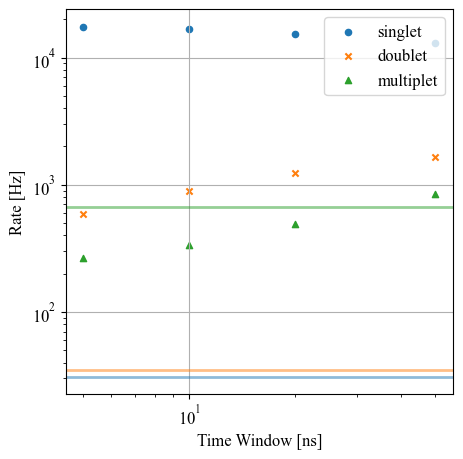

100%|██████████| 100/100 [00:04<00:00, 20.15it/s]


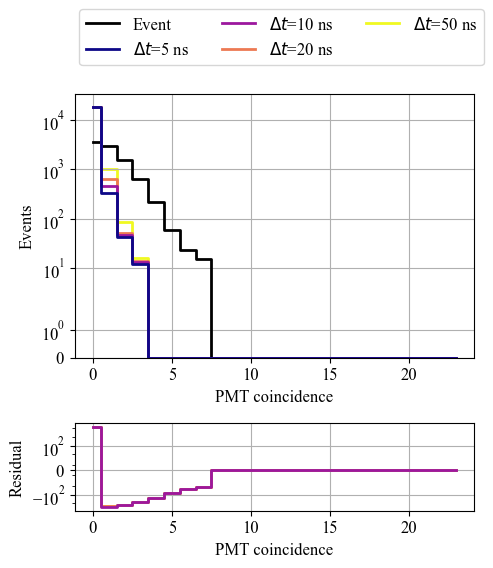

100%|██████████| 100/100 [00:05<00:00, 18.61it/s]


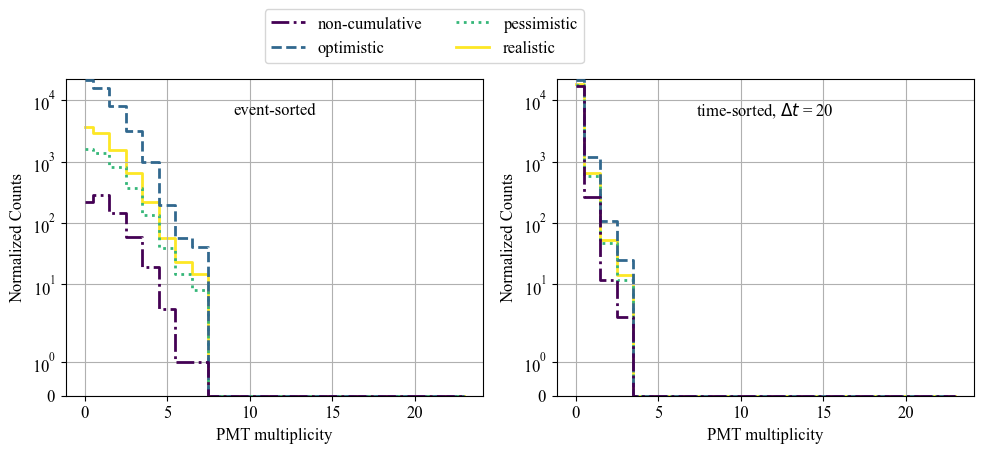

In [175]:
plotter.run()

In [2]:
chain = None
dirname = f"~/software/doumeki/bulkice_doumeki/analysis/files/output_geant4/background/mDOM/"
filebase = "bkg_leak"
type = "background"
plotdir = "./plots/background/"
simvol = 80
time = 1
mask = "QE"

plotter = SigBkgPlotter(dirname = dirname, filebase = filebase, type = type, plotdir = plotdir, 
                        simvol = simvol, time = time, chain = chain, mask = mask)

Loading data from file 'bkg_leak_80m_1s.dat' from directory '~/software/doumeki/bulkice_doumeki/analysis/files/output_geant4/background/mDOM/'.


100%|██████████| 100/100 [00:02<00:00, 44.71it/s]


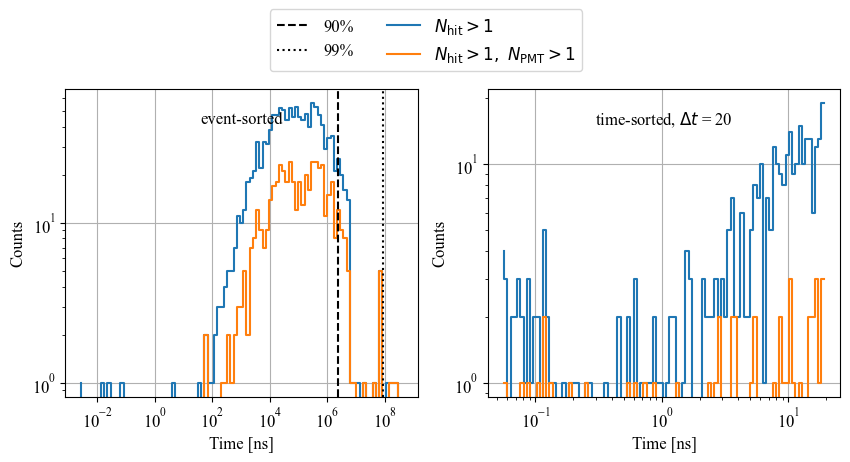

/home/jakob/software/doumeki/bulkice_doumeki/analysis/tests/helper.py:442: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(path, sep="\s+", comment="#", header=None, names=["diff_time", "pmt_id"], dtype={"dt": np.float64, "pmt_id": np.int16})


ZeroDivisionError: division by zero

In [3]:
plotter.run()

In [8]:
dirname = f"~/software/doumeki/bulkice_doumeki/analysis/files/output_geant4/background/mDOM/"
filebase = "ref_omsim"
type = "reference"
plotdir = "./plots/reference/"
time = 10 # max time in s

plotter = SigBkgPlotter(dirname = dirname, filebase = filebase, type = type, plotdir = plotdir, time = time)


Loading data from file 'ref_omsim.dat' from directory '~/software/doumeki/bulkice_doumeki/analysis/files/output_geant4/background/mDOM/'.


100%|██████████| 100/100 [00:27<00:00,  3.66it/s]


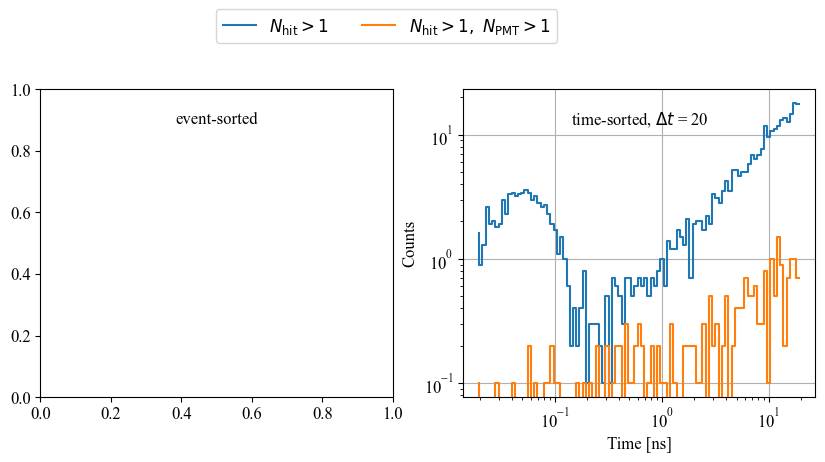

ZeroDivisionError: division by zero

In [9]:
plotter.run()

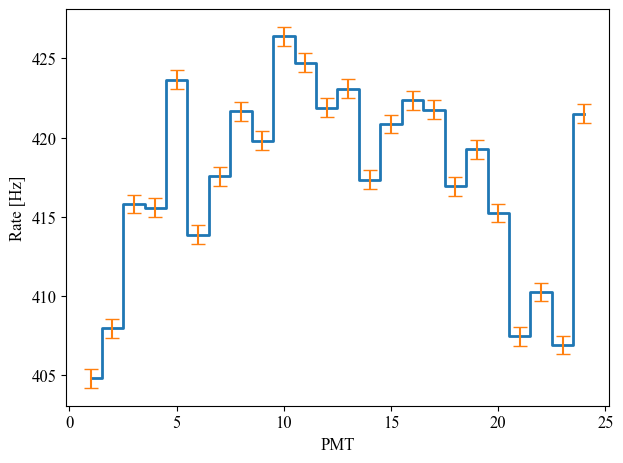

In [ ]:
measuring_time = 1200
rate = cnt_pmt / measuring_time
u_rate = np.sqrt(cnt_pmt) / measuring_time

fig, ax = plt.subplots(1,1)
ax.step(np.arange(1,25), rate, where = "mid", lw = 2)
ax.errorbar(np.arange(1,25), rate, yerr = u_rate, capsize = 5, ls = "none")

ax.set_xlabel("PMT")
ax.set_ylabel("Rate [Hz]")

plt.tight_layout()

In [ ]:
time = np.cumsum(df.dt).values * 1E9

In [ ]:
df.insert(2, "time", time, True)
df.insert(3, "ver_pos_x", np.zeros(df.shape[0]), True)
df.insert(4, "ver_pos_y", np.zeros(df.shape[0]), True)
df.insert(5, "ver_pos_z", np.zeros(df.shape[0]), True)

In [ ]:
df

,dt,pmt_id,time,ver_pos_x,ver_pos_y,ver_pos_z
0,0.000000e+00,18,0.000000e+00,0.0,0.0,0.0
1,1.529299e-07,18,1.529299e+02,0.0,0.0,0.0
2,3.947032e-06,18,4.099962e+03,0.0,0.0,0.0
3,5.479957e-06,18,9.579919e+03,0.0,0.0,0.0
4,2.048542e-06,18,1.162846e+04,0.0,0.0,0.0
...,...,...,...,...,...,...
12019833,6.509066e-06,13,1.200002e+12,0.0,0.0,0.0
12019834,1.025939e-05,13,1.200002e+12,0.0,0.0,0.0
12019835,5.497968e-05,13,1.200002e+12,0.0,0.0,0.0
12019836,1.494985e-03,13,1.200003e+12,0.0,0.0,0.0


In [ ]:
from scipy.optimize import minimize, root_scalar
from scipy.special import gammaincinv

In [ ]:
def inv_cdf_exp(y, tau):
    return -tau * np.log(1-y)

def cdf_exp(x, tau):
    return 1 - np.exp(-x/tau)

def pdf_exp(x, tau):
    return 1/tau * np.exp(-x/tau)

def pdf_two_exp(x, tau1, tau2):
    lam1, lam2 = 1/tau1, 1/tau2

    if tau1 != tau2:
        return (lam1*lam2/(lam2-lam1)) * (np.exp(-lam1 * x) - np.exp(-lam2 * x))
    else:
        return lam1**2 * x * np.exp(-lam1*x)
    
def cdf_two_exp(x, tau1, tau2):
    lam1, lam2 = 1/tau1, 1/tau2

    if tau1 != tau2:
        return 1/(lam2-lam1) * (lam1 * (np.exp(-lam2 * x) - 1) - lam2 * (np.exp(-lam1 * x) -1))
    else:
        return 1 - np.exp(-lam1 * x) * (lam1 * x + 1)


def fit_two_exp(x, args):
    y, tau1, tau2 = args
    return (y - cdf_two_exp(x, tau1, tau2))**2


def fit_exp(x, args):
    y, tau = args
    return (y - cdf_exp(x, tau))**2

def inv_cdf_two_exp(y, tau1, tau2):

    if tau1 != tau2:
        def func(x):
            return cdf_two_exp(x, tau1, tau2) - y

        # Use Brent’s method to efficiently solve for x
        sol = root_scalar(func, bracket=[0, 20 * max(tau1, tau2)], method='brentq')

        if sol.converged:
            return sol.root
        else:
            raise ValueError(f"Root finding failed: {sol.flag}")

        """
        res = minimize(fit_two_exp, x0 = (tau1+tau2)/2, args = [y, tau1, tau2], tol = 1E-10) # x0 = (tau1+tau2)/2
        if res.success:
            return res.x.item() 
        else:
            raise ValueError(f"Optimization failed: {res.message}")"
        """
    else:
        return gammaincinv(2, y) * tau1        
        
def sample_two_exp(tau1, tau2, num):
    cdf = np.random.uniform(0,1,num)

    if tau1 != tau2:
        x = []
        for y in cdf:
            x.append(inv_cdf_two_exp(y, tau1, tau2))
        return np.array(x)
    else:
        return gammaincinv(2, cdf) * tau1

In [161]:
tau1 = 50
tau2 = 50

num = int(1E7)
num_sam = int(1E5)
cdf1 = np.random.uniform(0,1,num)
cdf2 = np.random.uniform(0,1,num)

t1 = inv_cdf_exp(cdf1, tau1)
t2 = inv_cdf_exp(cdf2, tau2)
tcomb = t1 + t2
tsamp = sample_two_exp(tau1, tau2, num_sam)

trange = (np.min(tcomb), np.max(tcomb))


tt = np.linspace(trange[0], trange[1],1000, endpoint=True)
pdf1 = pdf_exp(tt, tau1)
pdf2 = pdf_exp(tt, tau2)
pdfcomb = pdf_two_exp(tt, tau1, tau2)

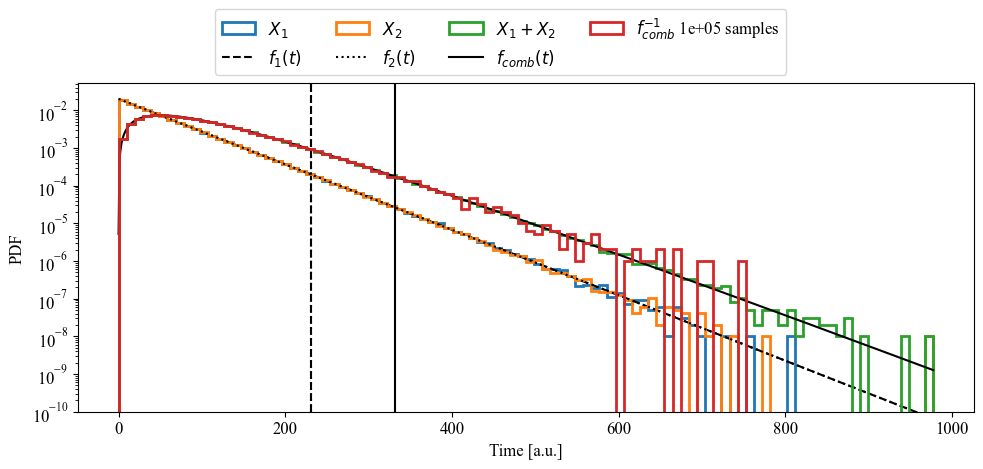

In [162]:
bins = 100
fig, ax = plt.subplots(1,1, figsize = (10,5))

# exponential 1
ax.hist(t1, bins = bins, range = trange, histtype="step", density=True, lw = 2, label = r"$X_1$")
ax.plot(tt, pdf1, color = "k", ls = "--", label = r"$f_1(t)$")
ax.axvline(inv_cdf_exp(0.99, tau1), color = "k", ls = "--")

# exponential 2
ax.hist(t2, bins = bins, range = trange, histtype="step", density=True, lw = 2, label = r"$X_2$")
ax.plot(tt, pdf2, color = "k", ls = ":", label = r"$f_2(t)$")
ax.axvline(inv_cdf_exp(0.99, tau2), color = "k", ls = ":")

# combined exponential
ax.hist(tcomb, bins = bins, histtype="step", density=True, lw = 2, label = r"$X_1+X_2$")
ax.plot(tt, pdfcomb, color = "k", ls = "-", label = r"$f_{comb}(t)$")
ax.axvline(inv_cdf_two_exp(0.99, tau1, tau2), color = "k", ls = "-")

# sampled from combined CDF
ax.hist(tsamp, bins = bins, range = trange, histtype="step", density=True, lw = 2, label = r"$f_{comb}^{-1}$"+" {:1.0e} samples".format(num_sam))

#ax.set_xscale("log")
ax.set_yscale("log")
#ax.set_xlim(0)
ax.set_ylim(1E-10)
ax.legend(ncol = 4, bbox_to_anchor=(0, 1.25, 0.8, 0),)

ax.set_xlabel("Time [a.u.]")
ax.set_ylabel("PDF")

plt.tight_layout()
plt.savefig("./plots/decay/demo_sum_exp_ratio_1.pdf")

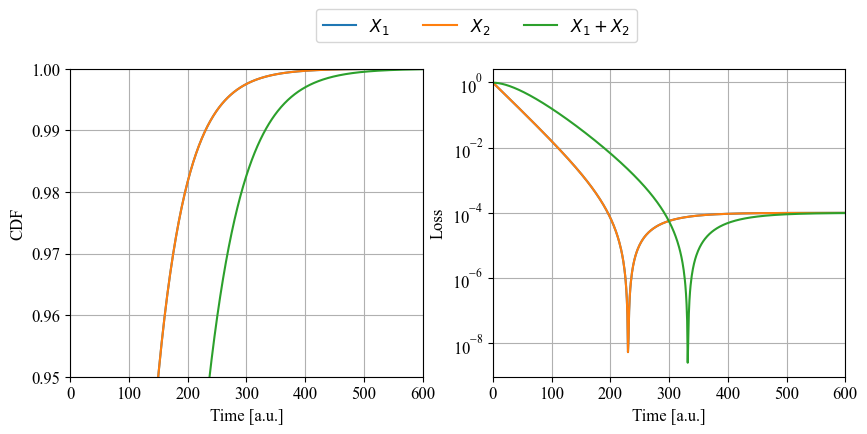

In [163]:
fig, ax = plt.subplots(1,2, figsize = (10,4))

ax[0].plot(tt, cdf_exp(tt, tau1))
ax[0].plot(tt, cdf_exp(tt, tau2))
ax[0].plot(tt, cdf_two_exp(tt, tau1, tau2))
ax[0].set_xlabel("Time [a.u.]")
ax[0].set_ylabel("CDF")
ax[0].set_xlim(0,600)
ax[0].set_ylim(0.95,1)
ax[0].grid()

ax[1].plot(tt, fit_exp(tt, [0.99, tau1]), label = r"$X_1$")
ax[1].plot(tt, fit_exp(tt, [0.99, tau2]), label = r"$X_2$")
ax[1].plot(tt, fit_two_exp(tt, [0.99, tau1, tau2]), label = r"$X_1 + X_2$")
ax[1].set_xlabel("Time [a.u.]")
ax[1].set_ylabel("Loss")
ax[1].set_yscale("log")
ax[1].set_xlim(0,600)
ax[1].grid()

fig.legend(ncol = 3, bbox_to_anchor=(0.7, 1.05))

plt.savefig("./plots/decay/cdf_loss_sum_exp_ratio_1.pdf", bbox_inches = "tight")


In [ ]:
inv_cdf_two_exp(0.99, tau1, tau2)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 9.442519507917327e-06
        x: [ 4.560e+02]
      nit: 1
      jac: [-8.034e-07]
 hess_inv: [[1]]
     nfev: 26
     njev: 13


456.03598685844815

In [ ]:
x = gammaincinv(2, cdf1) * tau1

In [ ]:
x.min(), x.max()

(np.float64(0.02661922090741476), np.float64(1152.4552683686072))

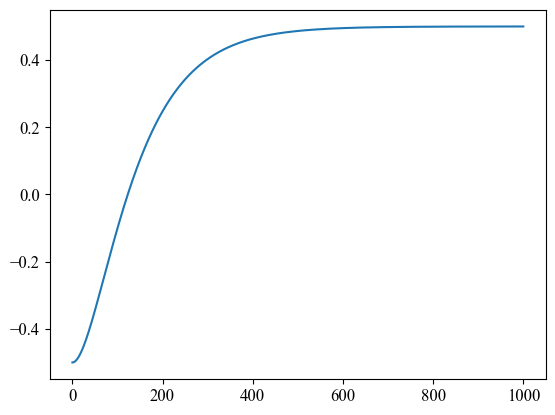

In [ ]:
x = np.linspace(0, 10 * max(tau1, tau2), 1000)
y = 0.5
plt.plot(x, cdf_two_exp(x, tau1, tau2) - y)

In [ ]:
cdf_two_exp(x[0], tau1, tau2) - y, cdf_two_exp(x[-1], tau1, tau2) - y

(np.float64(-0.5), np.float64(0.4999092022016286))